In [327]:
#!pip show prompt_toolkit 
#!pip install --upgrade prompt_toolkit
#!pip show bqplot

In [328]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook, curdoc
from bokeh.models import Arrow, NormalHead

def fig_font_sizes(fig):
    fig.title.text_font_size = '20pt'
    fig.xaxis.axis_label_text_font_size = '16pt'
    fig.yaxis.axis_label_text_font_size = '16pt'
    fig.xaxis.major_label_text_font_size = '14pt'
    fig.yaxis.major_label_text_font_size = '14pt'
    fig.xaxis.axis_label_text_font = "latex"
    fig.yaxis.axis_label_text_font = "latex"
    fig.xaxis.major_label_text_font = "latex"
    fig.yaxis.major_label_text_font = "latex"
    return None

In [684]:
%%HTML

<style>
td,th {
  font-size: 16pt
}
</style>

In [617]:
import pandas as pd

file_path = "~/Code/Publications/Courses/DSGE/mpd2020.xlsx"
df = pd.read_excel(file_path, sheet_name="Full data", header=0, index_col=[0,1,2])

#print(df.head())

dfUSA = df.loc['USA'].droplevel(0)
dfGBR = df.loc['GBR'].droplevel(0)
dfSWE = df.loc['SWE'].droplevel(0)
dfITA = df.loc['ITA'].droplevel(0)
dfFRA = df.loc['FRA'].droplevel(0)
dfJPN = df.loc['JPN'].droplevel(0)
dfCAN = df.loc['CAN'].droplevel(0)
dfAUS = df.loc['AUS'].droplevel(0)

file_path = "~/Code/Publications/Courses/DSGE/pwt1001.xlsx"
dfPWT = pd.read_excel(file_path, sheet_name="Data", header=0, index_col=[0,1,2,3])

dfS = dfPWT['csh_i'] #Saving rates



<span style="font-size:1.25em;">

## Post-war economic growth

- After WW2, the USA experienced over two decades of strong, sustained per-capita economic growth  
    - So did other rich countries that escaped the worst ravages of war
- From the 1950s, many devestated European economies grew much faster than the US
    - So did Japan, Taiwan and then South Korea

</span>

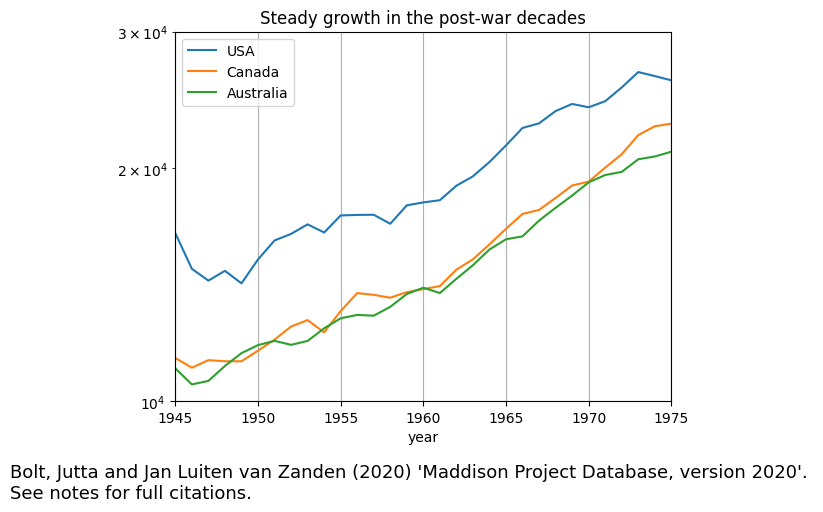

In [654]:
#Post-war growth

ax = dfUSA.gdppc.plot(logy=True, label='USA', grid=True)
ax.set_xlim(1945,1975)
ax.set_ylim(10000,30000)

#dfFRA.gdppc.plot(ax=ax, label='France')
#dfITA.gdppc.plot(ax=ax, grid=True, label='Italy')
dfCAN.gdppc.plot(ax=ax, grid=True, label='Canada')
dfAUS.gdppc.plot(ax=ax, grid=True, label='Australia')
ax.legend()
ax.set_title('Steady growth in the post-war decades');

#plt.show()
citation = "Bolt, Jutta and Jan Luiten van Zanden (2020) 'Maddison Project Database, version 2020'. \nSee notes for full citations."
ax.text(1935, 7500, citation, fontsize=13);


<span style="font-size:1.25em;">
    
## Kaldor's (1961) `stylised facts'
			
- Sustained growth of labour productivity 
- Sustained rate of capital deepening 
- Real interest rate is stable
- Capital and labour income shares are stable
- Appreciable (2&ndash;5%) variations in growth rates between countries
		
</span>

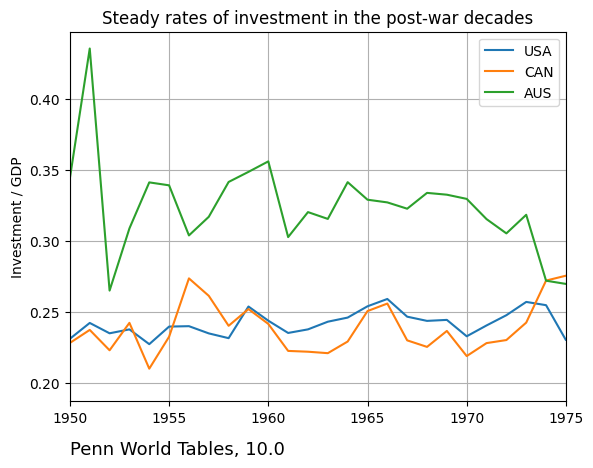

In [655]:

ax = dfS.loc["USA"].droplevel(0).droplevel(0).plot(logy=False, label='USA');
ax.set_xlim(1950,1975)
#ax.set_ylim(10000,30000)

dfS.loc["CAN"].droplevel(0).droplevel(0).plot(ax=ax, label='CAN');
dfS.loc["AUS"].droplevel(0).droplevel(0).plot(ax=ax, label='AUS', grid=True);

ax.set_title("Steady rates of investment in the post-war decades")
ax.set_xlim(1950,1975)
ax.set_xlabel("")
ax.set_ylabel("Investment / GDP")
ax.legend();
citation = "Penn World Tables, 10.0"
ax.text(1950, 0.15, citation, fontsize=13);


<span style="font-size:1.25em;">

## Solow&ndash;Swan growth model

- What we now call the Solow&ndash;Swan growth model was developed independently by 
    - Robert Solow (1956) in QJE: A Contribution to the Theory of Economic Growth.
    - Trevor Swan (1956) in the Economic REcord: Economic growth and capital accumulation
- How does the level of investment affect output and growth?
    - Focus on *investment* and *capital accumulation*
    - Ignores determinants of savings&mdash; which equal investment in the original model 


</span>

<span style="font-size:0.9em;">

## Solow&ndash;Swan growth model

- Robert Solow (1956, A Contribution to the Theory of Economic Growth, *Quarterly Journal of Economics*, 70(1), 65–94) asks the question *"How much fixed investment is necessary to support alternative rates of growth of potential output in the United States in the near future?*.
- Solow notes capital formation is necessary but not *sufficient* to generate growth and does not seek to explain how the required rate of investment can actually be delivered. 
- Solow discusses variability of the savings rate, but writes (p88) *"Everyone is familiar with the inconclusive discussions, both abstract and econometrical, as to whether the rate of interest really has any independent effect on the volume of saving, and if so, in what direction*.  	
- Trevor Swan (1956, Economic growth and capital accumulation, *The Economic Record*, 32: 334-361) independently develops a similar model. 	
		
</span>

<span style="font-size:1.25em;">
    
## Solow&ndash;Swan assumptions (discrete time version)

- We will consider an economy in discrete time
- Aggregate output is $Y_t = F( A_t, L_t, K_t)$
    - Decreasing returns to labour $L_t$
    - Decreasing returns to capital $K_t$
    - Constant returns to scale, i.e. $F(A_t, a L_t, a K_t) = a F(A_t, L_t, K_t)$
    - Technology $A_t$ is non-rival and non-excludable
- A constant fraction $s$ of output $Y_t$ is saved and invested each period
- Capital $K_t$ is accumulated through investment $I_t$ and depreciates at rate $\delta$ and
- The intial capital stock $K_0$ is given 

</span>

<span style="font-size:1.25em;">
    
## Solow&ndash;Swan equations

Given $K_0$
$$ C_t + I_t = Y( A_t,  L_t, K_t), $$
$$ C_t = \left( 1 - s \right) Y(A_t , L_t, K_t),  $$
$$ K_{t+1} = \left(1 - \delta \right) K_t + I_t. $$

Substitute out $C_t$ and $I_t$ to describe the economy by a single equation:
$$ K_{t+1} = \left(1 - \delta \right) K_t + s Y( A_t,  L_t, K_t). $$

</span>

<span style="font-size:1.25em;">
    
## Growth in Solow&ndash;Swan

- Where does aggregate growth come from?
    - Growth in population (more specifically, labour force)
    - Improvements in technology
    - Capital deepening
- Stylised growth assumptions:
    - Labour supply $L_t$ grows at rate $g_L$
        - Often suppose $L_t = \gamma N_t$ where $N_t$ is population
    - Technology $A_t$ grows at rate $g_A$
- Capital deepending may *temporarily* increase or decrease growth

</span>

<span style="font-size:1.2em;">
    
## Normalisation

- Normalise by units of effective labour, e.g. $\,y_t \equiv {Y_t}/\left({A_t L_t}\right)$
- Renders the model *stationary* if $A_t$ is purely labour-augmenting (Harrod-neutral).
- Consider the standard Cobb-Douglas function $\,Y_t = (A_t L_t)^{1-\alpha} K_t^\alpha$
- Effective labour grows at rate $g = \left(1+g_A\right)\left(1+g_L\right) - 1 \approxeq g_A + g_L$
- Divide all terms of the model equation by $A_t L_t$:
$$ \frac{A_{t+1} L_{t+1}}{A_t L_t} \frac{K_{t+1}}{A_{t+1} L_{t+1}} 
= \left(1 - \delta \right) \frac{K_t}{A_t L_t} 
+ s \frac{\left(A_t L_t\right)^{1-\alpha} K^\alpha}{A_t L_t} $$
- The normalised model is
$$ \left(1+g\right)\, k_{t+1} = \left(1 - \delta \right) k_t + s k^\alpha $$

</span>

<span style="font-size:1.2em;">
    
## Steady state

- There exists a steady state s.t. $k_{t+1} = k_t = k_{\text{SS}}$, so
$$ \left(1+g\right)\, k_{\text{SS}} = \left(1 - \delta \right) k_{\text{SS}} + s k_{\text{SS}}^\alpha $$
$$\implies k_{\text{SS}} = \left(\frac{ s }{\delta+g} \right)^{1 / \left(1-\alpha\right)}  $$
- Having found $ k_\text{SS}$, we obtain $ \, y_\text{SS} = k_\text{SS}^\alpha $ and $ \,c_\text{SS} = \left(1-s\right) \,y_\text{SS}$

</span>

<span style="font-size:1.2em;">
    
## Convergence to steady state

- What happens if we follow the savings rule from any initial capital stock?
    - If $k_0 < k_\text{SS}$: $k_t \to  k_\text{SS}$ from below as  $t \to \infty$ 
    - If $k_0 > k_\text{SS}$: $k_t \to  k_\text{SS}$ from above as  $t \to \infty$
- Important features of the transition:
    - Globally stable (growth never explodes or collapses)
    - No over-shooting the steady-state 

</span>

In [329]:
"""Convergence"""
from bokeh.models.tickers import FixedTicker
from bokeh.models import CustomJSTickFormatter

curdoc().theme = 'light_minimal'

# parameters - need extreme values to make the plot clear
delta = 0.4
alpha = 0.2
gy = 0.1

kgoldss = alpha / (delta + gy) * np.power(alpha / (delta + gy), alpha / (1-alpha)) 

# data vectors
k = np.linspace(kgoldss/2000, 1.5*kgoldss, 1000)
knext = ((1 - delta) * k + alpha * np.power(k, alpha)) / (1+gy)

fig = figure(title="Convergence to steady-state", x_axis_label="k(t)", 
             width=600, height=500, x_range=(0,k[-1]))

fig.line(k, knext, line_width=2, color='blue')
fig.line(k, k, line_width=1, color='black')
#fig.line(goldenx, goldeny, line_width=3, color='black')

nh = NormalHead(size=10, fill_color='black', fill_alpha=1, line_color='black')


def draw_convergence(num_arrows, idx):
    for i in range(num_arrows):
        kn = knext[idx]
        if i == 0:
            kstart = 0
        else:
            kstart = k[idx]
        fig.add_layout(Arrow(end=nh, x_start=k[idx], x_end=k[idx], 
                       y_start=kstart, y_end=knext[idx], line_width=1))
        idx1 = np.searchsorted(k, kn)
        fig.add_layout(Arrow(end=nh, x_start=k[idx], x_end=k[idx1], 
                       y_start=knext[idx], y_end=knext[idx], line_width=1))
        idx = idx1

draw_convergence(4, 250) #Arrows from below equilibrium
draw_convergence(2, 900) #Arrows from above equilibrium

fig.yaxis.axis_label = "k(t+1)"



fig.yaxis.ticker = FixedTicker(ticks=[])
fig.xaxis.ticker = FixedTicker(ticks=[k[250], kgoldss, k[900]])
fig.xaxis.major_label_overrides = {k[250]: r"low $$k(0)$$", 
                                   kgoldss: r"$$k_{SS}$$",
                                   k[900]: r"high $$k(0)$$"}

fig_font_sizes(fig)

# show the results
output_notebook(hide_banner=True)
show(fig)

<span style="font-size:1.2em;">
    
## Solow&ndash;Swan golden rule

- What rate of saving maximises consumption in the long run?
- We know
$$   c_{\text{SS}} = \left( 1 - s \right) \left(  \frac{s}{\delta + g} \right)^{ \frac{\alpha}{1-\alpha} } $$
- To find optimal $s^*$:
$$ {\frac{\partial c_t}{ \partial s}} \Bigg|_{s^*}  = 
\left[\frac{\alpha}{1-\alpha} \left( \frac{1 - s^*}{s^*} \right) - 1 \right] \left(  \frac{s^*}{\delta + g} \right)^{ \frac{\alpha}{1-\alpha} } = 0$$
$$ \implies  \frac{1 - s^*}{s^*}  = \frac{1-\alpha}{\alpha} \quad \implies s^*  = {\alpha} $$ 
- $s^* = \alpha$ is the "golden rule" 
</span>

In [673]:
"""Golden rule plot"""
curdoc().theme = 'light_minimal'

# parameters
delta = 0.06
alpha = 0.4
gy = 0.01

# data vectors
s = np.linspace(0, 1, 200)
y = np.power(s / (delta + gy), alpha / (1-alpha)) 
c = (1 - s) * y 
i = s * y
k = i / (delta + gy) 


idx = np.searchsorted(s, alpha)
#goldenx = np.array([s[idx],s[idx],s[idx]])
#goldeny = np.array([i[idx],c[idx],y[idx]])

fig = figure(title="Golden rule", x_axis_label="s", width=600, height=500,
            x_range=(0,1), y_range=(0, y[-1]))

fig.line(s, y, legend_label='y', line_width=2, color='purple')
fig.line(s, i, legend_label='i', line_width=2, color='blue')
fig.line(s, c, legend_label='c', line_width=2, color='green')

nh = NormalHead(size=15, fill_color='black', fill_alpha=1, line_color='black')
fig.add_layout(Arrow(end=nh, start=nh,
                   x_start=s[idx], y_start=i[idx], x_end=s[idx], y_end=y[idx]))
#line_color='black', line_dash=[15, 5],

fig.yaxis.ticker = FixedTicker(ticks=[0,y[-1]])
fig.yaxis.major_label_overrides = {0: r"$$0$$",
                                   y[-1]: r"$$y_{\text{max}}$$"}
fig.xaxis.ticker = FixedTicker(ticks=[0,1])
fig.xaxis.major_label_overrides = {0: r"$$0$$",
                                   y[-1]: r"$$1$$"}
fig.legend.location = "top_left"
fig.legend.label_text_font_size = '16pt'

fig_font_sizes(fig)

# show the results
output_notebook(hide_banner=True)
show(fig)

<span style="font-size:1.2em;">
    
## Balanced growth
- To recover the original variables, multiply by $A_t L_t$
    - e.g. $Y_t = A_t L_t y_t$
- Since $y_t \to y_\text{SS}$ the output growth rate converges to $g \approxeq g_A + g_L$
    - Growth rates of $C_t$ and $K_t$ also converge to $g$
    - This is known as a *balanced growth path*
    - Denote their values on the  by $\bar{C}_t$, $\bar{Y}_t$ and $\bar{K}_t$
- From a welfare perspective, we care more about $C_t/L_t$ than $C_t$
    - Growth rate of $C_t / L_t$ converges to $g_A \approxeq g - g_L$

</span>

<span style="font-size:1.2em;">
    
## How do parameters affect long run consumption?

<table align="center">
    <tr>
        <td>Parameter</td>
         <td>Condition</td>
        <td>$c_\text{SS}$ </td>
        <td>$\bar{C}_t / L_t$</td>
    </tr>
    <tr style="border-top: 2px solid black;">
   <tr>
        <td>$g_A  \uparrow$ </td>
        <td></td>
        <td>$  \downarrow$ </td>
         <td>$ \uparrow \uparrow$ </td>
    </tr><tr>
        <td> $g_L \uparrow $</td>
        <td></td>
        <td>$ \downarrow$ </td>
         <td>$ \downarrow$ </td>
    </tr><tr>
        <td>$\delta \uparrow$ </td>
        <td></td>
        <td>$  \downarrow$ </td>
        <td>$ \downarrow$ </td>
    </tr>
    <tr>
        <td rowspan="2"> $s \uparrow $</td>
        <td> $  s > \alpha$ </td>
         <td>$  \downarrow $ </td>
         <td>$ \downarrow$ </td>
    </tr><tr>
    <td style="background-color: #f2f2f2;"> $  s < \alpha$</td>
    <td style="background-color: #f2f2f2;"> $ \uparrow $</td>
    <td style="background-color: #f2f2f2;"> $ \uparrow$ </td>
        </tr>
        <tr>
        <td rowspan="2"> $\alpha \uparrow $</td>
        <td> $  s > \delta + g\quad$ </td>
         <td>$  \uparrow $ </td>
         <td>$ \uparrow$ </td>
    </tr><tr>
    <td style="background-color: #f2f2f2;"> $  s < \delta + g$</td>
    <td style="background-color: #f2f2f2;"> $  \downarrow $</td>
    <td style="background-color: #f2f2f2;"> $ \downarrow$ </td>
    </tr>
        
</table>

  
</span>

<span style="font-size:1.25em;">
    
## How fast do we reach steady state?
- Recall $\, \left(1+g\right)\, k_{t+1} = \left(1 - \delta \right) k_t + s k^\alpha $ and
$k_\text{SS} = \left(s / \left(\delta + g\right) \right)^{1/(1-\alpha)}$

- Defining $\tilde{k}_t \equiv k_t  / k_\text{SS}$ and using the expression we got for $k_\text{SS}$
$$  g_{Kt} \equiv \frac{\tilde{k}_{t+1}}{\tilde{k}_{t}} - 1
= \left(\frac{1 - \delta}{1+g} \right) 
+ \left(\frac{\delta - g}{1+g} \right)  \tilde{k}^{\alpha-1} $$


<center><h3>Implications</h3></center>

<table align="center">
    <tr style="border-top: 2px solid black;">
    <tr>
        <td>$g_{Kt} \to 0 $  as $\tilde{k}_t \to 1$ </td>
        <td>For any $\tilde{k}_t$: </td>
    </tr><tr>
        <td>$g_{Kt}$ independent of *constant* $s\quad$ </td>
        <td>$\quad \delta \uparrow \implies g_{Kt} \uparrow$ </td>
    </tr><tr>
        <td> </td>
        <td>$\quad g \uparrow \implies g_{Kt} \uparrow$   </td>
    </tr><tr>
        <td> </td>
        <td>$\quad \alpha \uparrow \implies g_{Kt} \downarrow$   </td>
    </tr>
</table>


</span>

In [683]:
"""Convergence to balanced growth path"""
curdoc().theme = 'light_minimal'

from bokeh.models import LinearAxis, LinearScale, Range1d
from bokeh.layouts import layout
from ipywidgets import interact
from bokeh.io import push_notebook
from bokeh.models import Legend, LegendItem

def time_step(k0, s=0.4, delta=0.06, g=0.02, alpha=0.4):
    y = k0**alpha
    knext = ((1 - delta) * k0 + s * y) / (1 + g)
    return knext, y

def growth(k0=0.3, s=0.4, delta = 0.06, g = 0.02, alpha = 0.4):
    T = 200
    tvec = np.arange(0,T)
    kvec = np.zeros(T)
    yvec = np.zeros(T)
    kvec[0] = k0
    
    #Simulate growth
    for t in range(T):
        knext, y = time_step(kvec[t], s=s, delta=delta, g=g, alpha=alpha)
        if t < T-1:
            kvec[t+1] = knext
        yvec[t] = y
    return tvec, kvec, yvec

#Compute with default parameters
tvec, kvec, yvec = growth()

#Compute a version with lower depreciation rate (same IC)
tvec1, kvec1, yvec1 = growth(k0=0.3, s=0.4, delta = 0.03, 
                             g = 0.02, alpha = 0.4)


# Create a new plot
fig = figure(title="Convergence to balanced growth", width=600, height=500)

fig.xaxis.axis_label = "years"
fig.yaxis.axis_label = r"$$k_t/k_{ss}$$"
fig.yaxis.axis_label_text_color = "blue"

#kvec = kvec - kvec[0]
#yvec = yvec - yvec[0]
#kvec1 = kvec1 - kvec1[0]
#yvec1 = yvec1 - yvec1[0]

kvec = kvec / kvec[-1]
yvec = yvec / yvec[-1]
kvec1 = kvec1 / kvec1[-1]
yvec1 = yvec1 / yvec1[-1]

ymax = max(np.max(yvec), np.max(yvec1))
fig.extra_y_ranges = {"y": Range1d(0, np.ceil(ymax))}
fig.extra_y_scales = {"y": LinearScale()}

ax = LinearAxis(y_range_name="y", axis_label=r"$$y_t/y_{ss}$$", 
                axis_label_text_color="purple")
fig.add_layout(ax, "right")

kline = fig.line(tvec, kvec, legend_label='k (δ = 0.06)', color='blue', line_width=3)
yline1 = fig.line(tvec, yvec, legend_label='y (δ = 0.06)', color='purple', 
                  line_width=3, y_range_name='y')

kline1 = fig.line(tvec1, kvec1, legend_label=r"k (δ = 0.03)", 
         color='blue', line_dash='dashed', line_width=3)
yline1 = fig.line(tvec1, yvec1, legend_label=r"y (δ = 0.03)", 
         color='purple', line_dash='dashed',line_width=3, y_range_name='y')

fig.legend.label_text_font = 'latex'
fig.legend.location = "bottom_right"
fig.legend.label_text_font_size = '14pt'
fig.legend.background_fill_color = 'white'
fig.legend.background_fill_alpha = 0.6

fig_font_sizes(fig)

# show the results
output_notebook(hide_banner=True)
show(fig)


<span style="font-size:1.25em;">
    
## Summary of parameter and growth rate effects

<table align="center">
    <tr style="border-top: 2px solid black;">
        <th></th>
        <th></th>
        <th> Short run </th>
        <th colspan="2"> Long run</th>
        <th></th>
    </tr>
    <tr>
        <th>Parameter</th>
         <th>Condition</th>
        <th>$ g_{Kt} $</th>
        <th> $ c_\text{SS} $</th>
        <th>$\bar{C}_t / L_t $</th>
    </tr>
    <tr style="border-top: 2px solid black;">
   <tr>
        <td>$\delta \uparrow$ </td>
        <td></td>
        <td>$ \uparrow$ </td>
        <td>$ \downarrow$ </td>
        <td>$ \downarrow$ </td>
    </tr><tr>
        <td>$g_A  \uparrow$ </td>
        <td></td>
        <td>$ \uparrow$   </td>
        <td>$  \downarrow$ </td>
         <td>$\uparrow \uparrow$ </td>
    </tr><tr>
        <td> $g_L \uparrow $</td>
        <td></td>
        <td>$ \uparrow$   </td>
        <td>$ \downarrow$ </td>
         <td>$ \downarrow$ </td>
    </tr>
    <tr>
        <td rowspan="2"> $\alpha \uparrow $</td>
        <td> $  s > \delta + g\quad$ </td>
        <td >$   \downarrow$   </td>
         <td>$ \uparrow $ </td>
         <td>$ \uparrow$ </td>
    </tr><tr>
    <td style="background-color: #f2f2f2;"> $  s < \delta + g$</td>
          <td >$   \downarrow$   </td>
    <td style="background-color: #f2f2f2;"> $  \downarrow $</td>
    <td style="background-color: #f2f2f2;"> $ \downarrow$ </td>
    </tr>
    <tr>
        <td rowspan="2"> $s \uparrow $</td>
        <td> $  s > \alpha$ </td>
        <td>  &mdash;  </td>
         <td>$  \downarrow $ </td>
         <td>$ \downarrow$ </td>
    </tr><tr>
    <td style="background-color: #f2f2f2;"> $  s < \alpha$</td>
        <td>  &mdash;  </td>
    <td style="background-color: #f2f2f2;"> $  \uparrow $</td>
    <td style="background-color: #f2f2f2;"> $ \uparrow$ </td>
        </tr>
        
</table>


</span>

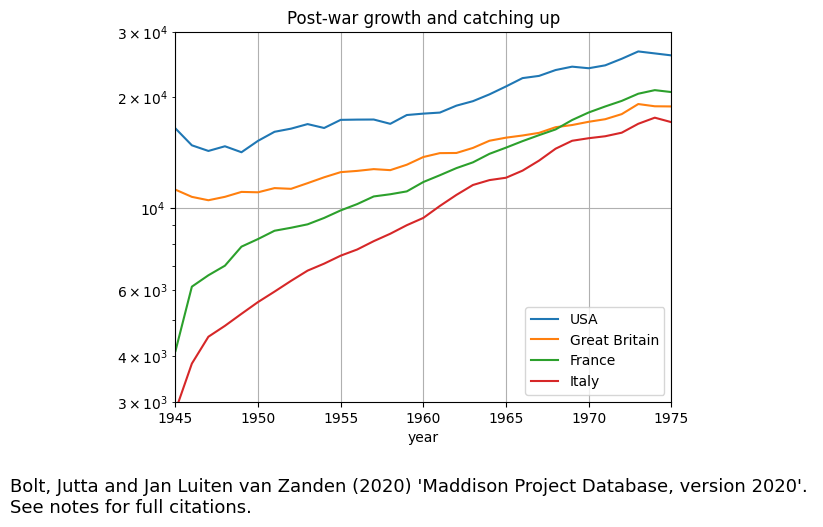

In [545]:
#Post-war growth
ax = dfUSA.gdppc.plot(logy=True, label='USA')
ax.set_xlim(1945,1975)
ax.set_ylim(3000,30000)
dfGBR.gdppc.plot(ax=ax, label='Great Britain')
dfFRA.gdppc.plot(ax=ax, label='France')
dfITA.gdppc.plot(ax=ax, grid=True, label='Italy')
ax.legend()
ax.set_title('Post-war growth and catching up');

#plt.show()
citation = "Bolt, Jutta and Jan Luiten van Zanden (2020) 'Maddison Project Database, version 2020'. \nSee notes for full citations."
ax.text(1935, 1500, citation, fontsize=13);


Full references for Maddison Project data used in plots:
- Bolt, Jutta and Jan Luiten van Zanden (2020), “Maddison style estimates of the evolution of the world economy. A new 2020 update". https://www.rug.nl/ggdc/historicaldevelopment/maddison/publications/wp15.pdf
- Malanima, P. (2010), “The long decline of a leading economy: GDP in central and northern Italy, 1300–1913” European Review of Economic History 15 (2): 169–219.
- Baffigi, A. (2011).”Italian National Accounts, 1861-2011”, Banca d’Italia Economic History Working Papers 18. 
- Ridolfi, L. (2016) “The French economy in the longue durée. A study on real wages, working days and economic performance from Louis IX to the Revolution (1250-1789)” Dissertation IMT School for Advanced Studies, Lucca, available at http://e-theses.imtlucca.it/211/1/Ridolfi_phdthesis.pdf
- Broadberry, S.N., B. Campbell, A. Klein, M. Overton and B. van Leeuwen (2015), British Economic Growth 1270-1870 Cambridge: Cambridge University Press.
- Broadberry, S.N., B. Campbell, A. Klein, M. Overton and B. van Leeuwen (2015), British Economic Growth 1270-1870 Cambridge: Cambridge University Press.
- McCusker, John J., ‘Colonial Statistics’, Historical Statistics of the United States: Earliest Time to the Present, in S. B. Carter, S. S. Gartner, M. R. Haineset al. New York, Cambridge University Press. V-671.
- Sutch, R. (2006). National Income and Product. Historical Statistics of the United States: Earliest Time to the Present, in S. B. Carter, S. S. Gartner, M. R. Haineset al. New York, Cambridge University Press III-23-25.
- Prados de la Escosura, L. (2009). “Lost Decades? Economic Performance in Post-Independence Latin America,” Journal of Latin America Studies 41: 279–307. (updated data)
- United Nations National Accounts Statistics

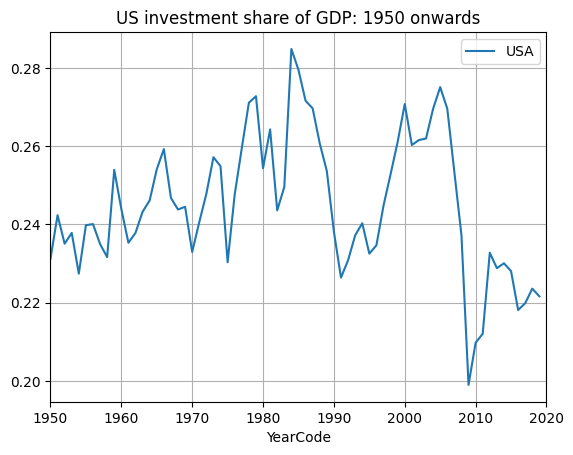

In [574]:
ax = dfPWT["USA"].plot(label="USA", grid=True);
ax.set_title("US investment share of GDP: 1950 onwards")
ax.set_xlim(1950,2020)
ax.legend();

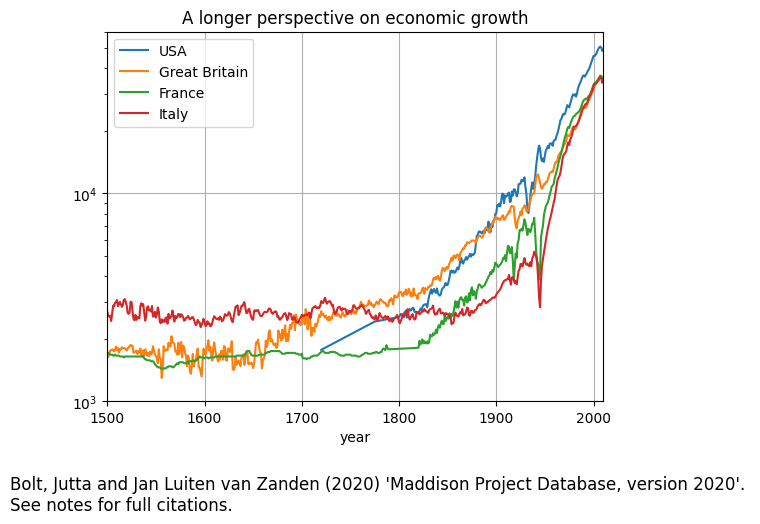

In [553]:
#Long view
ax = dfUSA.gdppc.plot(logy=True, label='USA')
ax.set_xlim(1500,2010)
ax.set_ylim(1000,60000)
dfGBR.gdppc.plot(ax=ax, label='Great Britain')
dfFRA.gdppc.plot(ax=ax, label='France')
dfITA.gdppc.plot(ax=ax, grid=True, label='Italy')
ax.legend();
ax.set_title('A longer perspective on economic growth');

citation = "Bolt, Jutta and Jan Luiten van Zanden (2020) 'Maddison Project Database, version 2020'. \nSee notes for full citations."
ax.text(1400, 300, citation, fontsize=12);



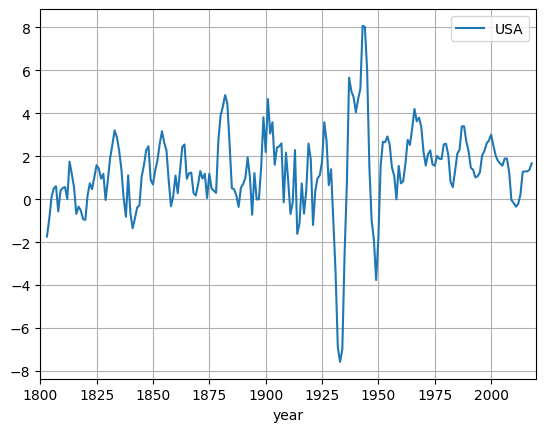

In [506]:
#Long view
dif = dfUSA.gdppc.iloc[10:].diff().iloc[1:]
dif = 100 * dif / dfUSA.gdppc.iloc[10:].iloc[1:]
#print(dif.head())

window_size = 5  # Adjust window size as needed
smooth_line = dif.rolling(window=window_size, min_periods=1).mean()

#print(smooth_line.head())

ax = smooth_line.plot(logy=False, grid=True, label='USA')
ax.set_xlim(1800,2020)
#ax.set_ylim(20000,60000)
#smooth_line.plot(ax=ax, label='Smoothed')
#dfFRA.gdppc.plot(ax=ax, label='France')
#dfITA.gdppc.plot(ax=ax, grid=True, label='Italy')
ax.legend();
